In [1]:
include("PVCR.jl");

# Residential cases

## Residential Case 1: Small PV System, this doesn't generate any injection into the grid

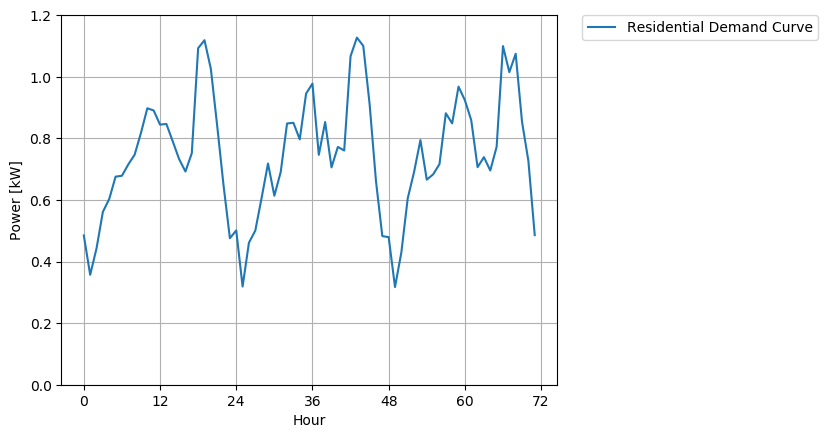

In [2]:
PVRes.capacity = 1.0
ts=simulate(residential, PVRes, 3);
plot(ts["demand_curve"], label = "Residential Demand Curve")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylim(0,1.2)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

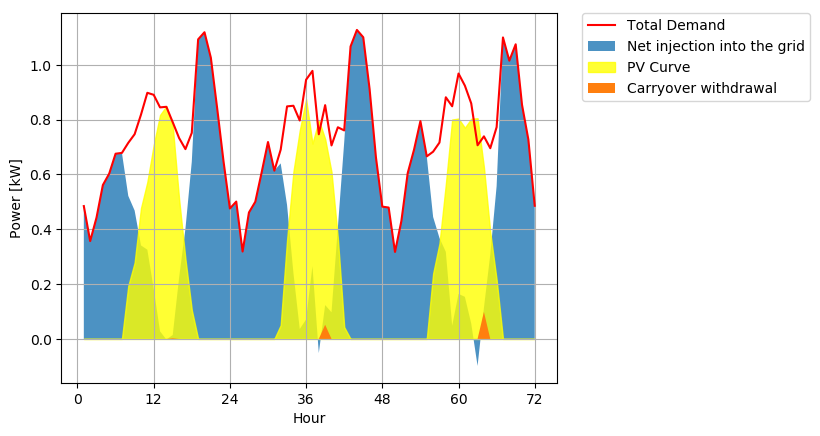

In [3]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 1

In [4]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 544.62 187.28 0.32 357.66 91.77 0.32 0.32 357.34 0.0 1.18 1.18
2 544.81 126.55 0.0 418.25 153.46 0.0 0.0 418.25 0.0 1.31 1.31
3 551.38 154.57 0.0 396.82 229.2 0.0 0.0 396.82 0.0 1.19 1.19
4 542.13 165.13 0.12 377.12 310.11 0.12 0.12 377.0 0.0 1.22 1.22
5 553.32 169.82 0.0 383.5 393.21 0.0 0.0 383.5 0.0 1.21 1.21
6 558.5 167.25 0.11 391.36 475.16 0.11 0.11 391.25 0.0 1.24 1.24
7 537.66 172.13 0.03 365.57 559.39 0.03 0.03 365.54 0.0 1.16 1.16
8 546.94 167.8 0.0 379.15 641.58 0.0 0.0 379.15 0.0 1.19 1.19
9 537.49 181.65 0.06 355.9 730.59 0.06 0.06 355.84 0.0 1.21 1.21
10 560.41 172.19 0.06 388.28 814.9 0.06 0.06 388.23 0.0 1.21 1.21
11 558.46 170.67 0.0 387.79 898.47 0.0 0.0 387.79 0.0 1.25 1.25
12 558.3 177.4 0.52 381.41 985.39 0.52 0.52 380.9 0.0 1.21 1.21


### Billings case residential 1

In [5]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_charge", " ", "total_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost demand_charge total_cost | counterfactual_cost savings
47429.1 6.69 0.0 55687.96  | 77857.23 22169.27
53528.71 0.0 0.0 62892.25  | 77878.95 14986.7
51382.41 0.0 0.0 60354.15  | 78657.95 18303.79
49398.22 2.49 0.0 58011.02  | 77562.55 19551.53
50048.76 0.0 0.0 58777.04  | 78887.25 20110.21
50824.87 2.3 0.0 59697.86  | 79500.63 19802.77
48249.79 0.68 0.0 56650.56  | 77033.09 20382.53
49612.61 0.0 0.0 58261.27  | 78132.12 19870.84
47279.09 1.3 0.0 55503.47  | 77012.39 21508.92
50521.87 1.19 0.0 59338.08  | 79726.79 20388.7
50477.92 0.0 0.0 59284.54  | 79495.26 20210.72
49787.96 10.9 0.0 58482.95  | 79476.4 20993.44


In [6]:
bills_residential[1]["savings"]

Dict{String,Any} with 5 entries:
  "demand_charges"      => 0.0
  "street_light"        => 656.243
  "VAT"                 => 2437.21
  "grid_energy_savings" => 18754.4
  "firefighters"        => 328.085

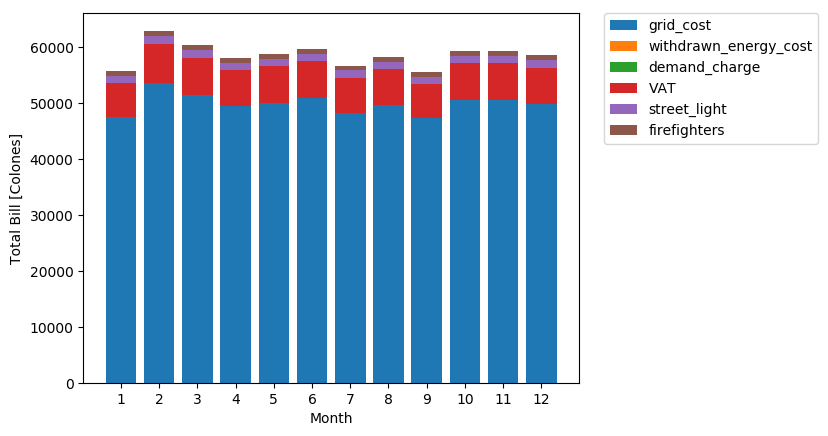

In [7]:
plot_bill(bills_residential, ["grid_cost", "withdrawn_energy_cost", "demand_charge", "VAT", "street_light", "firefighters"]);

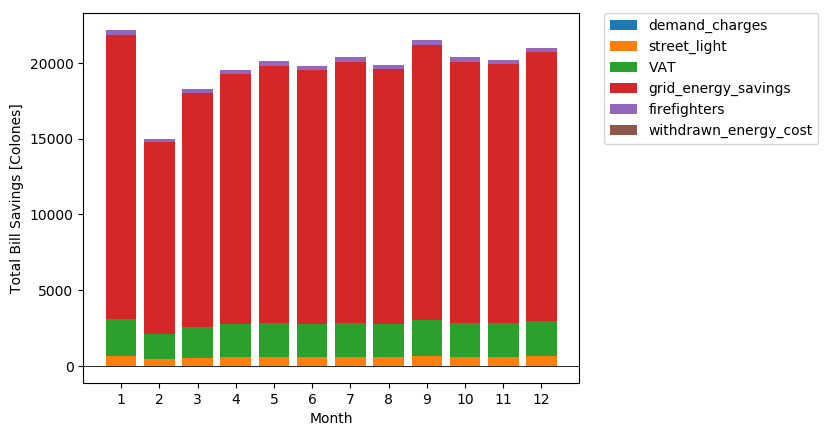

PyObject <matplotlib.lines.Line2D object at 0x14c0d4b38>

In [8]:
plot_savings(bills_residential)

## Residential Case 2: Medium Size PV System, produces some injection into the grid 

In [9]:
PVRes.capacity = 2.0
ts=simulate(residential, PVRes, 3);

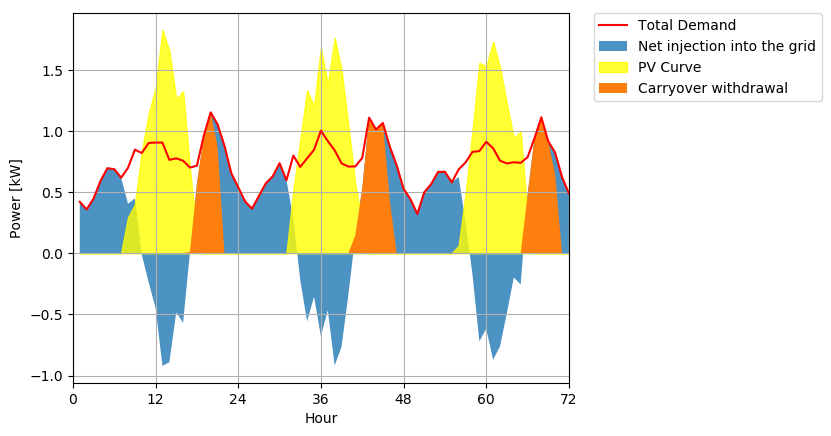

In [10]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
xlim(1,72)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 2

In [11]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 546.73 364.2 127.17 309.69 178.46 127.17 127.17 182.53 0.0 1.18 1.18
2 545.04 265.72 55.34 334.67 181.49 55.34 55.34 279.33 0.0 1.31 1.31
3 553.77 302.89 63.86 314.74 274.57 63.86 63.86 250.88 0.0 1.19 1.19
4 539.57 354.78 121.72 306.5 384.56 121.72 121.72 184.79 0.0 1.21 1.21
5 555.1 349.55 96.52 302.06 434.12 96.52 96.52 205.54 0.0 1.2 1.2
6 556.42 316.19 94.54 334.76 492.54 94.54 94.54 240.23 0.0 1.25 1.25
7 538.72 331.22 114.26 321.77 560.29 114.26 114.26 207.5 0.0 1.17 1.17
8 546.96 340.39 96.74 303.31 612.82 96.74 96.74 206.58 0.0 1.17 1.17
9 536.95 357.45 121.2 300.7 691.24 121.2 121.2 179.5 0.0 1.19 1.19
10 559.01 377.29 121.86 303.57 754.91 121.86 121.86 181.71 0.0 1.21 1.21
11 558.47 327.12 76.9 308.24 793.34 76.9 76.9 231.35 0.0 1.25 1.25
12 559.01 337.88 94.98 316.12 882.0 94.98 94.98 221.14 0.0 1.22 1.22


### Billings case residential 2

In [12]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_charge", " ", "total_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost demand_charge total_cost | counterfactual_cost savings
11522.85 2674.32 0.0 17378.28  | 78106.67 60728.4
20310.26 1163.82 0.0 25816.18  | 77907.11 52090.93
17554.59 1342.94 0.0 22789.64  | 78940.79 56151.15
11665.49 2559.72 0.0 17399.25  | 77258.49 59859.24
13162.86 2029.79 0.0 18493.8  | 79097.41 60603.61
16522.86 1988.12 0.0 22416.37  | 79253.96 56837.59
13352.95 2402.95 0.0 19209.29  | 77158.55 57949.26
13262.95 2034.37 0.0 18618.3  | 78134.53 59516.22
11332.0 2548.88 0.0 16983.78  | 76948.62 59964.84
11471.65 2562.68 0.0 17169.93  | 79560.75 62390.82
15662.66 1617.13 0.0 20910.5  | 79496.65 58586.15
14673.47 1997.44 0.0 20239.44  | 79561.21 59321.77


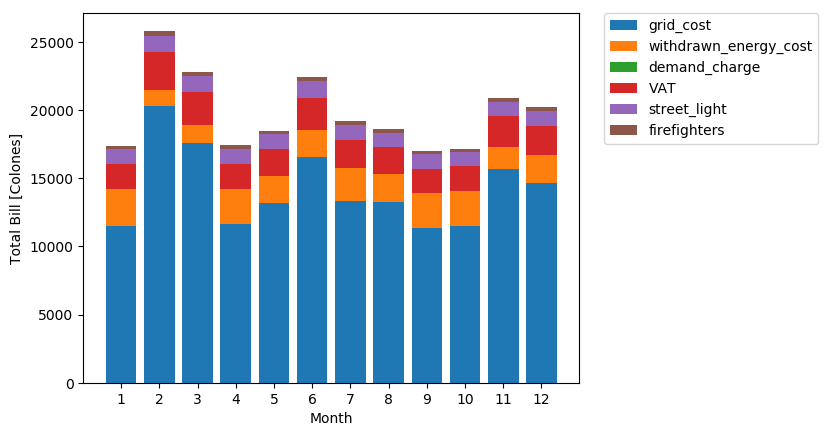

In [13]:
plot_bill(bills_residential, ["grid_cost", "withdrawn_energy_cost", "demand_charge", "VAT", "street_light", "firefighters"]);

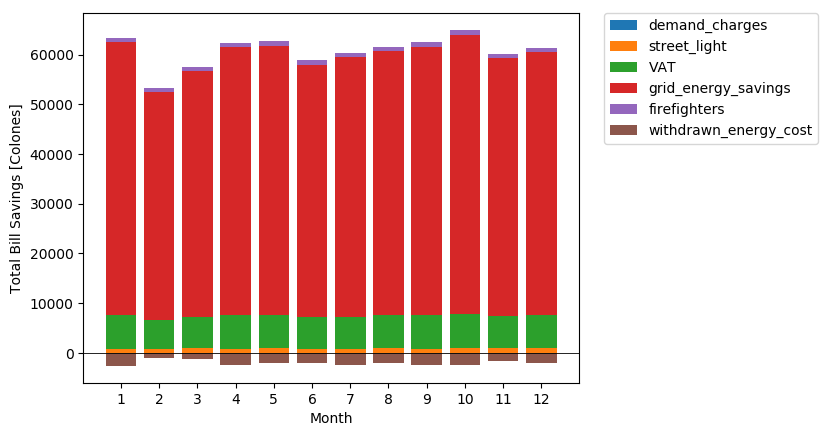

PyObject <matplotlib.lines.Line2D object at 0x14cb5c748>

In [14]:
plot_savings(bills_residential)

## Residential Case 3: Large PV System that generates multi-day carry over

In [15]:
PVRes.capacity = 4.0
ts=simulate(residential, PVRes, 3);

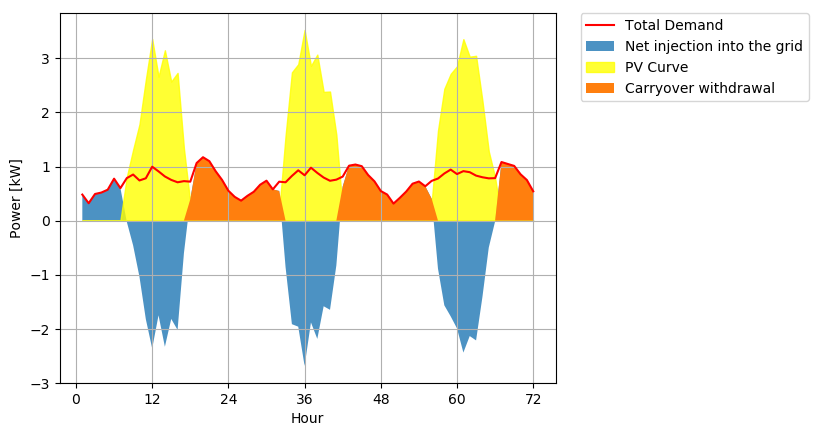

In [16]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 3

In [17]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 546.53 727.59 460.93 279.86 356.52 356.52 279.86 0.0 76.66 1.19 1.19
2 547.77 521.3 293.64 320.11 332.09 332.09 320.11 0.0 11.98 1.31 1.31
3 553.55 587.74 360.59 326.4 299.98 299.98 299.98 0.0 0.0 1.19 1.19
4 540.75 721.95 460.45 279.26 353.76 353.76 279.26 0.0 74.5 1.22 1.22
5 553.21 656.3 392.04 288.95 396.09 396.09 288.95 0.0 107.14 1.2 1.2
6 555.3 627.42 366.56 294.44 414.57 414.57 294.44 0.0 120.13 1.23 1.23
7 538.55 680.42 429.63 287.76 453.54 453.54 287.76 0.0 165.78 1.17 1.17
8 545.65 723.75 460.34 282.24 520.42 520.42 282.24 0.0 238.18 1.19 1.19
9 535.73 717.52 455.71 273.92 589.76 589.76 273.92 0.0 315.84 1.2 1.2
10 558.74 666.79 402.68 294.64 642.57 642.57 294.64 0.0 347.93 1.21 1.21
11 559.62 647.72 379.95 291.85 665.31 665.31 291.85 0.0 373.47 1.25 1.25
12 559.65 739.26 465.25 285.64 735.71 735.71 285.64 0.0 450.0

### Billings case residential 3

In [18]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_charge", " ", "total_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost demand_charge total_cost | counterfactual_cost savings
0.0 5885.56 0.0 6970.88  | 78082.96 71112.08
0.0 6731.88 0.0 8848.42  | 78229.49 69381.08
0.0 6308.51 0.0 8384.7  | 78914.12 70529.42
0.0 5872.76 0.0 6955.73  | 77398.79 70443.06
0.0 6076.56 0.0 7987.06  | 78873.68 70886.63
0.0 6192.08 0.0 8138.9  | 79121.55 70982.65
0.0 6051.59 0.0 7954.24  | 77137.54 69183.3
0.0 5935.52 0.0 7801.67  | 77978.71 70177.05
0.0 5760.58 0.0 6822.86  | 76804.41 69981.55
0.0 6196.2 0.0 8144.31  | 79529.48 71385.16
0.0 6137.52 0.0 8067.18  | 79632.95 71565.76
0.0 6006.96 0.0 7895.57  | 79637.15 71741.58


In [19]:
bills_residential[2]

Dict{String,Any} with 13 entries:
  "Balance"                      => Dict{String,Any}("PV_energy"=>521.299,"cons…
  "total_savings"                => 69381.1
  "savings"                      => Dict{String,Any}("demand_charges"=>0.0,"str…
  "demand_charge"                => 0.0
  "total_energy_cost"            => 6731.88
  "grid_cost"                    => 0.0
  "counterfactual_demand_charge" => 0.0
  "VAT"                          => 875.145
  "counterfactual_cost"          => 78229.5
  "firefighters"                 => 117.808
  "street_light"                 => 1123.58
  "total_cost"                   => 8848.42
  "withdrawn_energy_cost"        => 6731.88

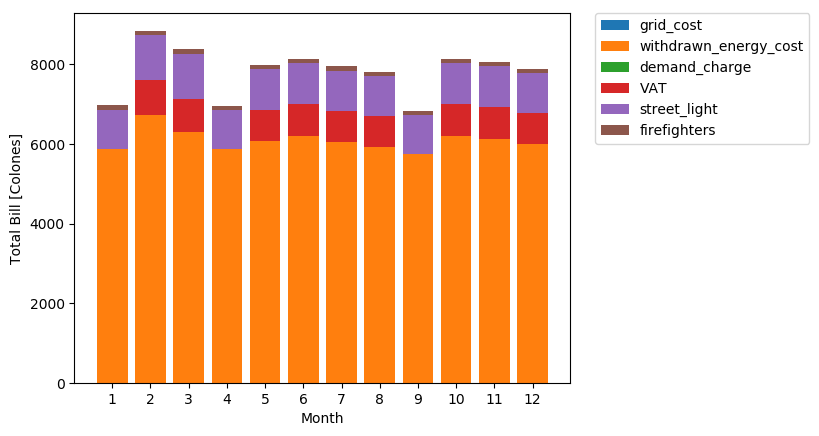

In [20]:
plot_bill(bills_residential, ["grid_cost", "withdrawn_energy_cost", "demand_charge", "VAT", "street_light", "firefighters"]);

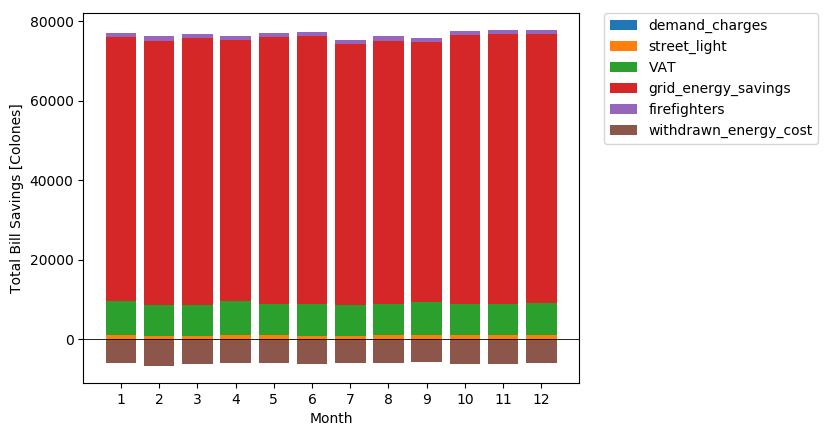

PyObject <matplotlib.lines.Line2D object at 0x14d0da128>

In [21]:
plot_savings(bills_residential)

# Commercial consumer subject to commercial and small size industrial tariff cases

## Commercial case1: small PV system

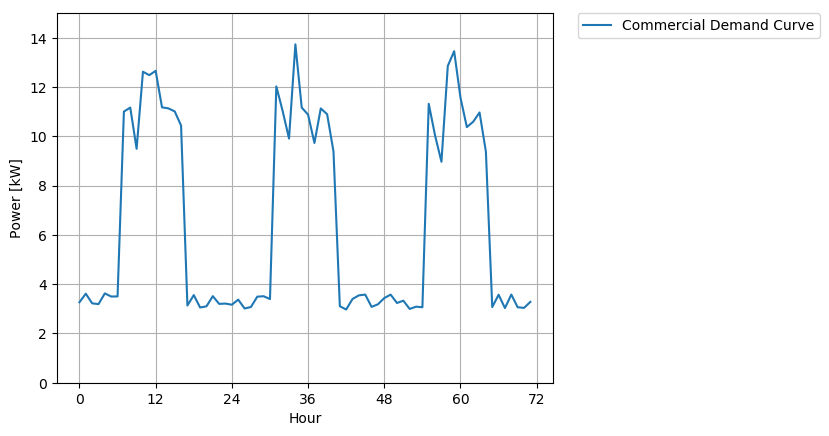

In [22]:
ts=simulate(commercial, PVComInd, 3);
plot(ts["demand_curve"], label = "Commercial Demand Curve")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylim(0,15)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

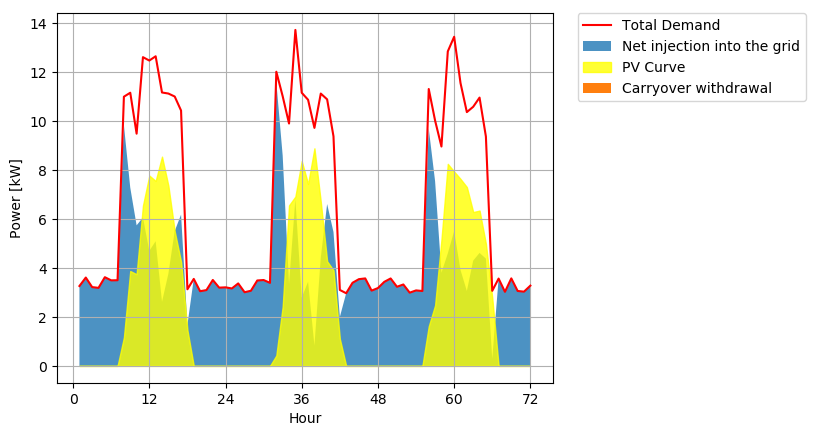

In [23]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [24]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 4988.44 1835.87 0.0 3152.57 899.58 0.0 0.0 3152.57 0.0 14.71 10.26
2 5115.38 1417.85 0.0 3697.53 1594.32 0.0 0.0 3697.53 0.0 16.84 12.62
3 4863.97 1590.58 0.0 3273.4 2373.71 0.0 0.0 3273.4 0.0 14.49 10.72
4 5022.42 1608.11 0.0 3414.31 3161.68 0.0 0.0 3414.31 0.0 15.49 10.7
5 5354.31 1597.15 0.0 3757.16 3944.28 0.0 0.0 3757.16 0.0 15.7 11.32
6 5210.86 1623.62 0.0 3587.24 4739.85 0.0 0.0 3587.24 0.0 15.93 11.38
7 4969.02 1698.61 0.0 3270.41 5572.18 0.0 0.0 3270.41 0.0 14.74 10.43
8 5020.29 1649.81 0.0 3370.48 6380.58 0.0 0.0 3370.48 0.0 14.96 10.15
9 4925.54 1625.43 0.0 3300.1 7177.04 0.0 0.0 3300.1 0.0 15.16 10.62
10 4746.88 1635.72 0.0 3111.16 7978.55 0.0 0.0 3111.16 0.0 14.15 8.91
11 4970.11 1742.38 0.0 3227.74 8832.31 0.0 0.0 3227.74 0.0 15.12 10.38
12 4837.42 1789.7 0.0 3047.72 9709.27 0.0 0.0 3047.72 0.0 14.38 8.98


In [25]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
202457.93 0.0 103169.21 361772.65  | 320357.71 147880.41 554812.67  | 193040.02
237455.69 0.0 126919.94 431099.38  | 328509.92 169319.21 589213.93  | 158114.55
210217.44 0.0 107738.22 376343.74  | 312364.26 145698.77 542699.87  | 166356.13
219267.15 0.0 107612.62 387078.77  | 322540.04 155704.38 566414.18  | 179335.41
241285.08 0.0 113770.97 420614.45  | 343853.81 157813.98 594457.41  | 173842.96
230372.8 0.0 114437.91 408261.51  | 334641.47 160101.51 586007.7  | 177746.19
210025.5 0.0 104897.1 372852.81  | 319110.46 148204.45 553685.11  | 180832.3
216452.11 0.0 102018.28 377275.16  | 322402.91 150438.3 560206.5  | 182931.34
211932.58 0.0 106770.25 377294.86  | 316317.94 152449.2 555198.92  | 177904.06
199798.54 0.0 89547.21 342944.41  | 304844.56 142268.85 529724.18  | 186779.77
207285.14 0.0 104359.44 368941.51  | 319180.78 1520

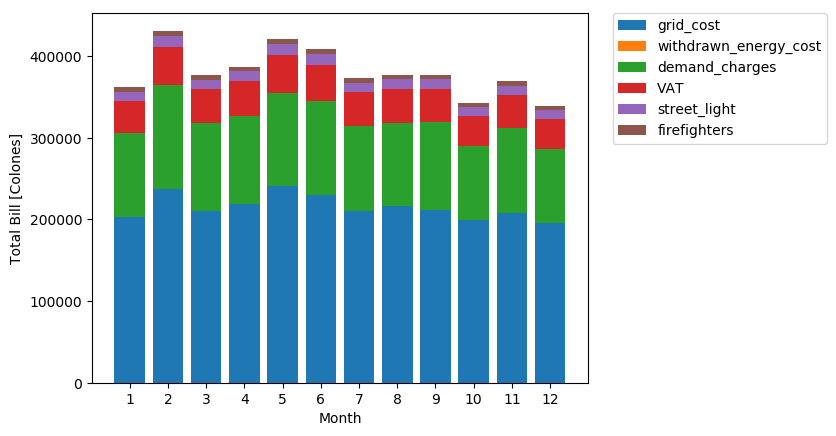

In [26]:
plot_bill(bills_commercial, ["grid_cost", "withdrawn_energy_cost", "demand_charges", "VAT", "street_light", "firefighters"]);

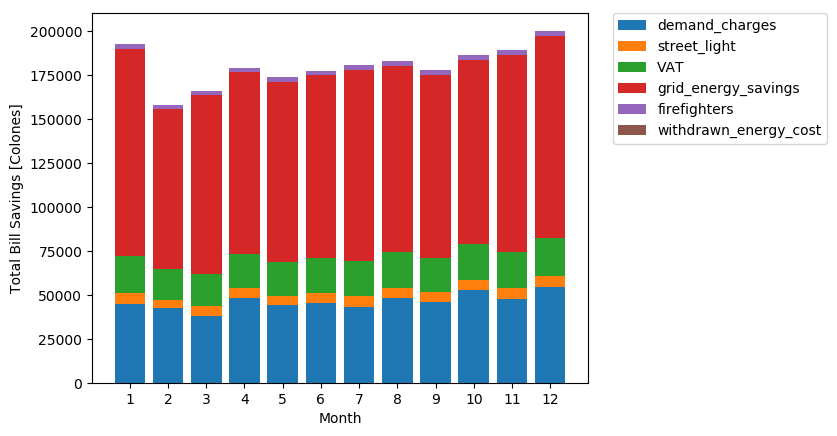

PyObject <matplotlib.lines.Line2D object at 0x14c8c7fd0>

In [27]:
plot_savings(bills_commercial)

## Commercial case 2: medium PV system

In [28]:
PVComInd.capacity = 21.0
ts=simulate(commercial, PVComInd, 3);

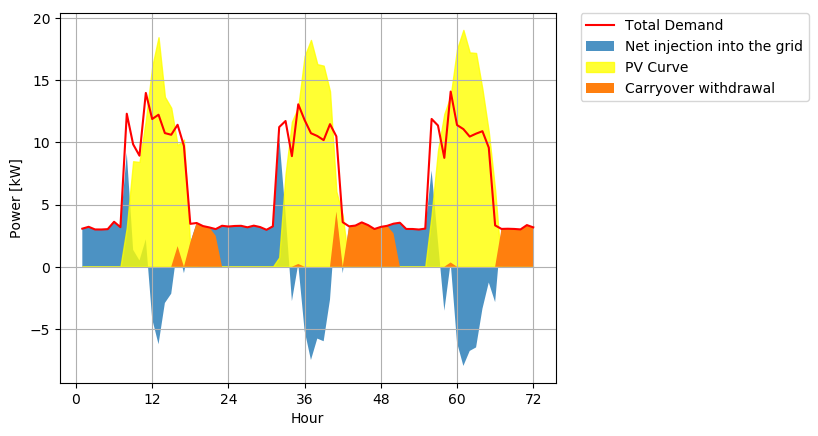

In [29]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [30]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 4990.12 4160.79 825.77 1655.1 2038.79 825.77 825.77 829.33 0.0 14.76 5.02
2 5089.8 2803.28 187.34 2473.86 2586.62 187.34 187.34 2286.52 0.0 16.88 12.64
3 4835.5 3117.31 487.63 2205.81 3926.77 487.63 487.63 1718.18 0.0 14.45 10.84
4 5010.22 3390.17 481.97 2102.03 5100.32 481.97 481.97 1620.06 0.0 15.45 8.58
5 5352.17 3778.51 559.9 2133.56 6469.82 559.9 559.9 1573.66 0.0 15.91 7.75
6 5196.77 3544.46 535.48 2187.78 7646.71 535.48 535.48 1652.31 0.0 16.01 9.62
7 4951.0 3415.19 583.64 2119.45 8784.68 583.64 583.64 1535.81 0.0 14.74 10.08
8 4990.74 3617.96 523.84 1896.62 9973.84 523.84 523.84 1372.78 0.0 14.78 7.36
9 4919.1 3520.78 558.79 1957.11 11175.18 558.79 558.79 1398.32 0.0 15.17 10.79
10 4736.97 3675.46 616.92 1678.42 12417.37 616.92 616.92 1061.51 0.0 14.17 6.83
11 4970.91 3628.37 567.26 1909.8 13578.35 567.26 567.26 1342.5

In [31]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_cost", " ", "total_cost", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost demand_cost total_cost | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
88472.8 17366.02 0.0 127259.45  | 320465.64 148402.0 555540.95  | 428281.49
243925.63 3939.72 0.0 293108.72  | 326866.79 169671.97 587643.41  | 294534.69
183295.57 10254.78 0.0 229841.4  | 310535.55 145282.48 540023.77  | 310182.37
172827.75 10135.92 0.0 217328.95  | 321756.54 155370.07 565088.67  | 347759.72
167877.97 11774.61 0.0 213640.11  | 343716.62 159935.73 596727.21  | 383087.1
176268.29 11261.06 0.0 222869.05  | 333736.62 160963.93 585909.55  | 363040.5
163840.47 12273.96 0.0 209530.6  | 317953.2 148146.93 552227.9  | 342697.31
146448.5 11016.27 0.0 187347.95  | 320505.34 148624.59 555844.1  | 368496.14
149173.08 11751.3 0.0 191530.19  | 315904.48 152493.75 554753.01  | 363222.82
113241.45 12973.79 0.0 150723.26  | 304207.97 142409.63 529120.44  | 378397.19
143221.87 11929.47 0.0 184739.55  | 319231.58 152150.67 558359.01  | 373619.46
14

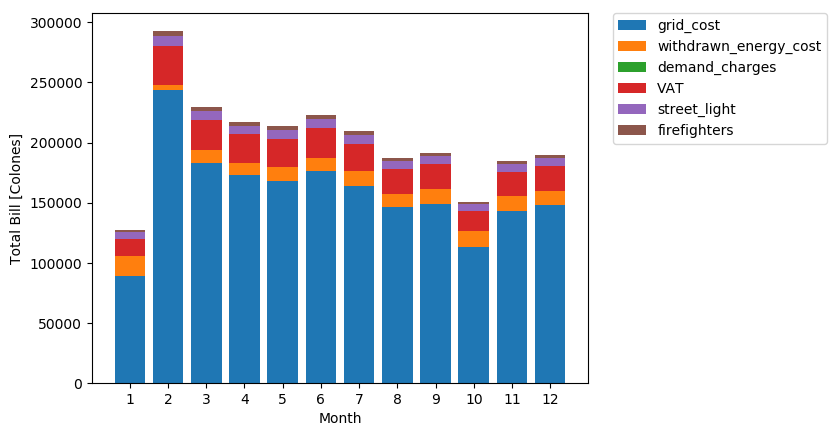

In [32]:
plot_bill(bills_commercial, ["grid_cost", "withdrawn_energy_cost", "demand_charges", "VAT", "street_light", "firefighters"]);

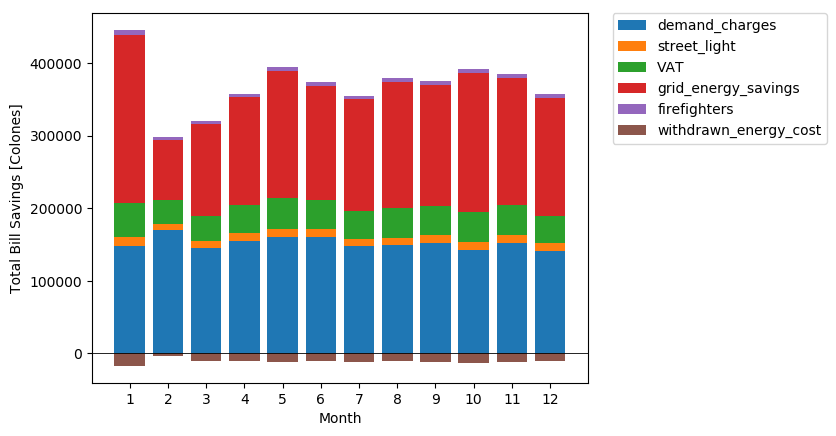

PyObject <matplotlib.lines.Line2D object at 0x14d9057b8>

In [33]:
plot_savings(bills_commercial)

## Commercial case 3: Large PV system

In [34]:
PVComInd.capacity = 32.0
ts=simulate(commercial, PVComInd, 3);

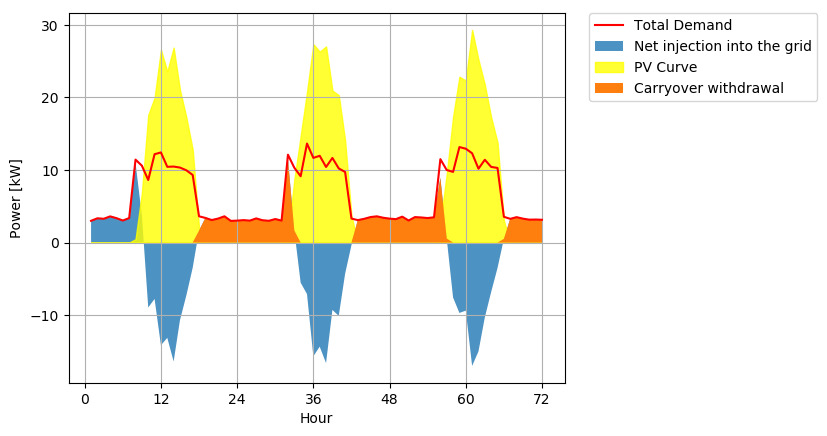

In [35]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [36]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy injection_grid grid_energy global_allowance allowance withdrawn_energy utility_supplied_energy carryover peak_power peak_demand
1 4989.93 5984.43 2604.27 1609.77 2932.37 2604.27 1609.77 0.0 994.5 14.76 6.06
2 5085.15 4587.74 1488.99 1986.41 3570.59 2483.49 1986.41 0.0 497.09 16.83 12.63
3 4845.52 4716.3 1775.51 1904.74 3895.17 2272.6 1904.74 0.0 367.86 14.49 10.77
4 5021.37 4870.56 1626.36 1777.17 4377.01 1994.22 1777.17 0.0 217.05 15.5 7.76
5 5368.31 5755.73 2098.49 1711.07 5420.14 2315.54 1711.07 0.0 604.47 15.94 6.11
6 5172.27 5740.69 2134.28 1565.86 6522.01 2738.75 1565.86 0.0 1172.9 16.02 5.91
7 4972.12 5542.87 2070.43 1499.68 7672.17 3243.33 1499.68 0.0 1743.65 14.62 4.98
8 5021.06 5029.63 1701.24 1692.67 8637.01 3444.89 1692.67 0.0 1752.23 14.8 7.36
9 4918.12 5195.11 1750.98 1473.99 9489.94 3503.21 1473.99 0.0 2029.22 15.18 3.8
10 4744.08 5500.95 2336.81 1579.93 10711.42 4366.02 1579.93 0.0 2786.09 14.11 7.75
11 4946.07 5387.16 1906.16 1465.07 117

In [37]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
0.0 33853.45 0.0 44497.12  | 320453.3 148383.92 555505.36  | 511008.24
0.0 41774.12 0.0 54908.09  | 326568.49 169169.59 586708.33  | 531800.24
0.0 40056.62 0.0 52650.59  | 311179.45 145663.23 541234.76  | 488584.17
0.0 37373.95 0.0 49124.48  | 322472.26 155855.57 566506.18  | 517381.7
0.0 35983.79 0.0 47297.26  | 344753.07 160260.48 598345.83  | 551048.57
0.0 32929.97 0.0 43283.29  | 332162.91 161040.11 584105.13  | 540821.83
0.0 31538.2 0.0 41453.96  | 319309.32 146991.67 552532.52  | 511078.57
0.0 35596.77 0.0 46788.55  | 322452.21 148820.88 558409.77  | 511621.22
0.0 30998.08 0.0 40744.01  | 315841.5 152640.1 554845.22  | 514101.21
0.0 33226.02 0.0 43672.42  | 304664.67 141850.05 529027.35  | 485354.93
0.0 30810.43 0.0 40497.36  | 317636.63 153437.11 557917.82  | 517420.46
0.0 31863.84 0.0 41881.97  | 311360.49 145138.04 540849

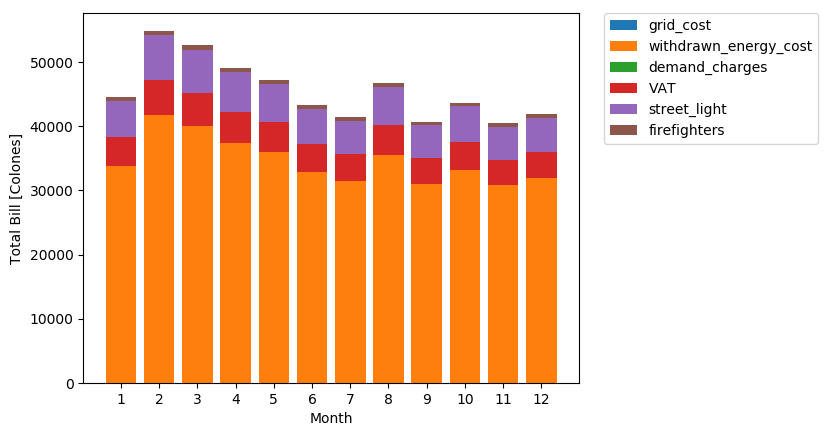

PyObject Text(24.0, 0.5, 'Total Bill [Colones]')

In [38]:
plot_bill(bills_commercial, ["grid_cost", "withdrawn_energy_cost", "demand_charges", "VAT", "street_light", "firefighters"])

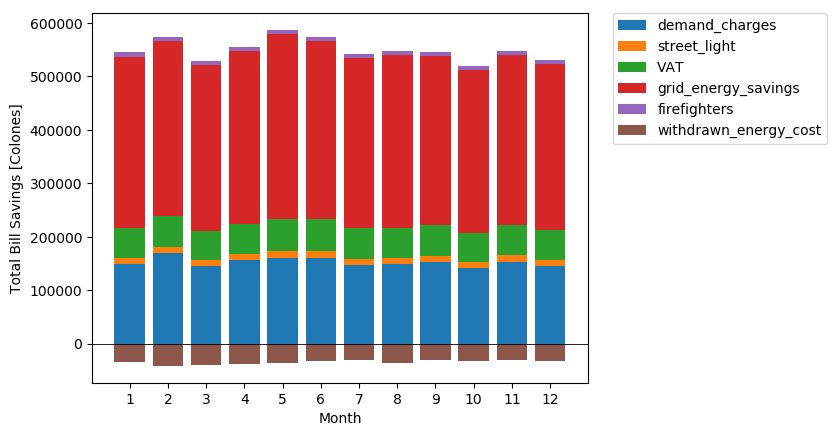

PyObject <matplotlib.lines.Line2D object at 0x14dc2f198>

In [39]:
plot_savings(bills_commercial)

# Medium Voltage (TMT) cases, users are medium to large industrial consumers.

## TMT case 1: small PV system

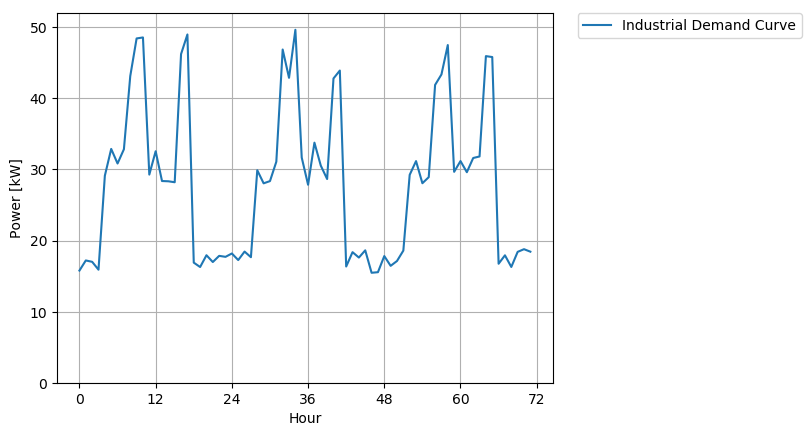

In [40]:
ts=simulate(mediumvoltage, PVTMT, 3);
plot(ts["demand_curve"], label = "Industrial Demand Curve")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ylim(0,52)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

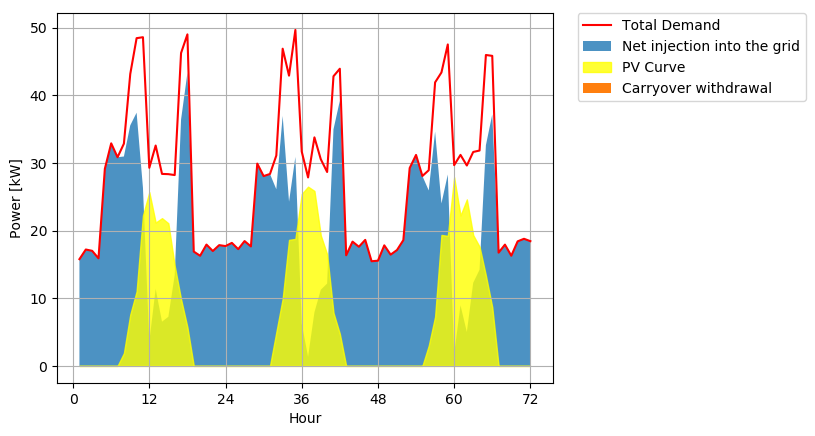

In [41]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [42]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy total_injection global_allowance withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | global_generation global_withdrawal carry_over  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | 
1 | 7193.2 8103.15 5708.9  | 5708.01 0.0 2796.92 0.0  | 4866.16 4722.19 5708.9  | 5708.01 0.0 0.0  | 50.8 50.4 33.86  | 50.64 34.96 33.86 
2 | 6674.0 7483.01 5303.57  | 3965.97 0.0 4740.25 0.0  | 4915.31 5275.72 5303.57  | 9673.98 0.0 0.0  | 51.64 51.6 34.37  | 51.64 39.34 34.37 
3 | 7215.85 8165.8 5694.05  | 4291.41 0.0 6843.04 0.0  | 5368.23 5722.01 5694.05  | 13965.38 0.0 0.0  | 50.81 50.7 33.26  | 50.81 33.86 33.26 
4 | 7512.81 8394.36 5932.17  | 5074.38 0.0 9329.49 0.0  | 5242.07 5590.72 5932.17  | 19039.77 0.0 0.0  | 54.38 54.07 35.97  | 54.26 37.22 35.97 
5 | 7255.61 8110.29 5732.04  | 5331.75 0.0 11942.04 0.0  | 4982.45 5051.

In [43]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "total_savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | total_savings
264816.48 128490.72 111837.44  | 0.0  | 391454.13 220486.72 111837.44  | 483220.31 237389.1 145972.19  | 484817.34 342189.79 145972.19  | 393008.6 
267491.09 143552.44 103896.97  | 0.0  | 363198.81 203612.71 103896.97  | 492775.41 267151.94 148149.31  | 492775.41 350345.42 148149.31  | 288128.86 
292139.21 155695.97 111546.48  | 0.0  | 392686.5 222191.47 111546.48  | 484914.23 229932.07 143381.75  | 484914.23 344286.8 143381.75  | 337966.49 
285273.52 152123.47 116211.21  | 0.0  | 408847.29 228410.56 116211.21  | 517836.0 252745.45 155062.36  | 518970.29 367163.52 155062.36  | 379747.75 
271144.78 137457.0

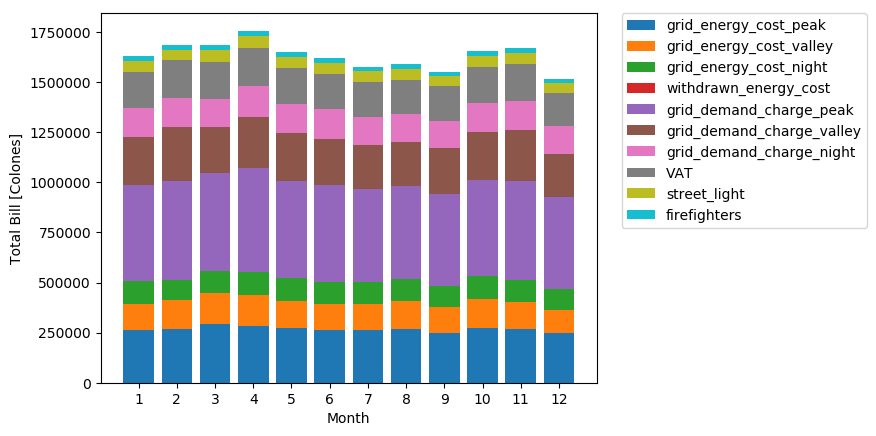

In [44]:
fields = ["grid_energy_cost_peak", 
        "grid_energy_cost_valley",
        "grid_energy_cost_night", 
        "withdrawn_energy_cost",      
        "grid_demand_charge_peak",    
        "grid_demand_charge_valley", 
        "grid_demand_charge_night",
        "VAT", "street_light", "firefighters"]
plot_bill(bills_TMT, fields);

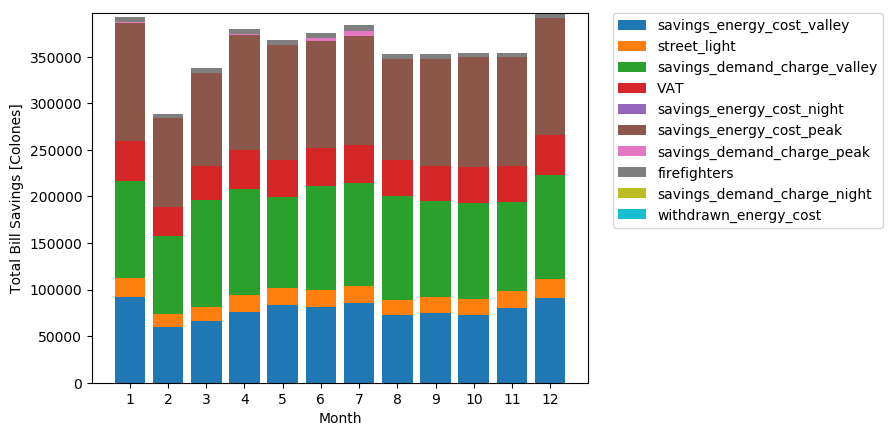

PyObject <matplotlib.lines.Line2D object at 0x14e302f28>

In [45]:
plot_savings(bills_TMT)

## TMT Case2: Medium PV System

In [46]:
PVTMT.capacity = 75
ts=simulate(mediumvoltage, PVTMT, 3);

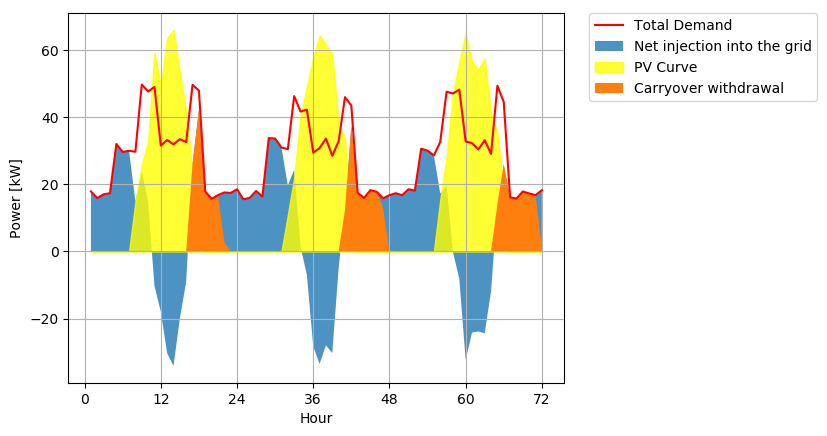

In [47]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [48]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy total_injection global_allowance withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | global_generation global_withdrawal carry_over  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | 
1 | 7218.37 8075.45 5730.6  | 14620.26 3995.7 7163.93 3995.7  | 3165.93 1503.33 5730.6  | 14620.26 3995.7 0.0  | 50.77 50.74 33.57  | 50.73 33.79 33.57 
2 | 6621.81 7462.39 5269.04  | 10627.63 2217.37 8375.77 2217.37  | 3146.19 2527.75 5269.04  | 25247.89 6213.07 0.0  | 51.62 50.68 34.03  | 51.61 34.01 34.03 
3 | 7236.97 8077.73 5778.58  | 11450.63 2048.1 11769.2 2048.1  | 3558.79 2353.38 5778.58  | 36698.51 8261.17 0.0  | 50.69 50.66 33.78  | 50.69 33.63 33.78 
4 | 7494.0 8387.14 5912.14  | 12334.0 1704.69 15764.76 1704.69  | 3275.85 1975.99 5912.14  | 49032.51 9965.86 0.0  | 54.35 54.31 36.1  | 54.12 36.25 36.1 
5 | 7226.6 8095.85 

In [49]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "total_savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | total_savings
80689.89 0.0 112262.55  | 84029.55  | 392823.75 219732.97 112262.55  | 484117.08 229409.5 144720.4  | 484460.66 344552.97 144720.4  | 767736.42 
104691.52 41707.34 103220.48  | 46631.34  | 360358.65 203051.58 103220.48  | 492468.44 230926.58 146685.47  | 492616.23 344149.89 146685.47  | 631255.76 
147071.96 31605.3 113202.41  | 43071.55  | 393835.71 219794.96 113202.41  | 483709.61 228381.35 145616.65  | 483709.61 343948.93 145616.65  | 658372.64 
122940.58 35047.61 115818.77  | 35849.64  | 407823.66 228214.16 115818.77  | 516433.64 246156.13 155608.47  | 518646.98 368735.08 155608.47  | 723782.15 
71444.9

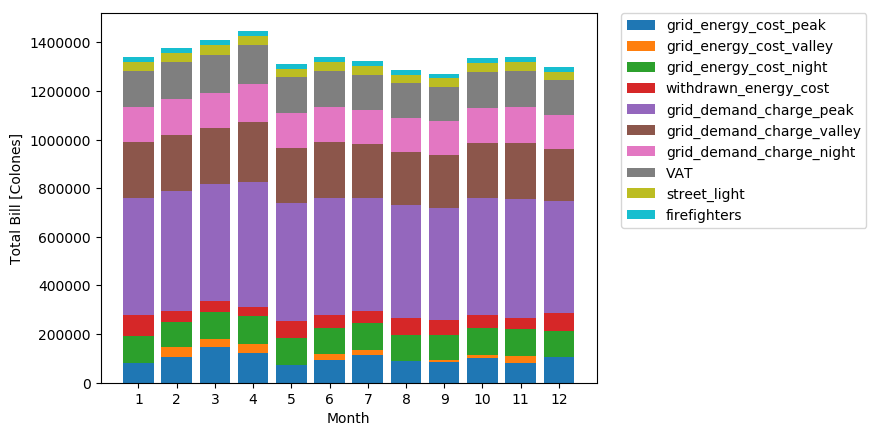

In [50]:
fields = ["grid_energy_cost_peak", 
        "grid_energy_cost_valley",
        "grid_energy_cost_night", 
        "withdrawn_energy_cost",      
        "grid_demand_charge_peak",    
        "grid_demand_charge_valley", 
        "grid_demand_charge_night",
        "VAT", "street_light", "firefighters"]
plot_bill(bills_TMT, fields);

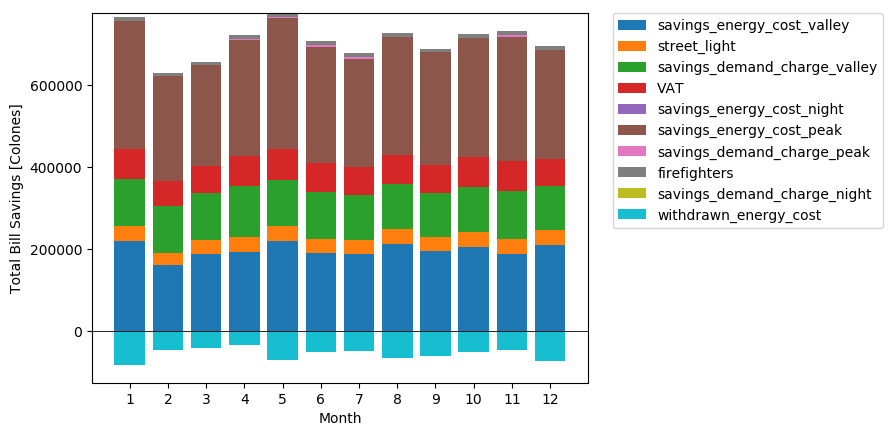

PyObject <matplotlib.lines.Line2D object at 0x14e3839e8>

In [51]:
plot_savings(bills_TMT)

## TMT Case 3: Large PV System

In [52]:
PVTMT.capacity = 150
ts=simulate(mediumvoltage, PVTMT, 3);

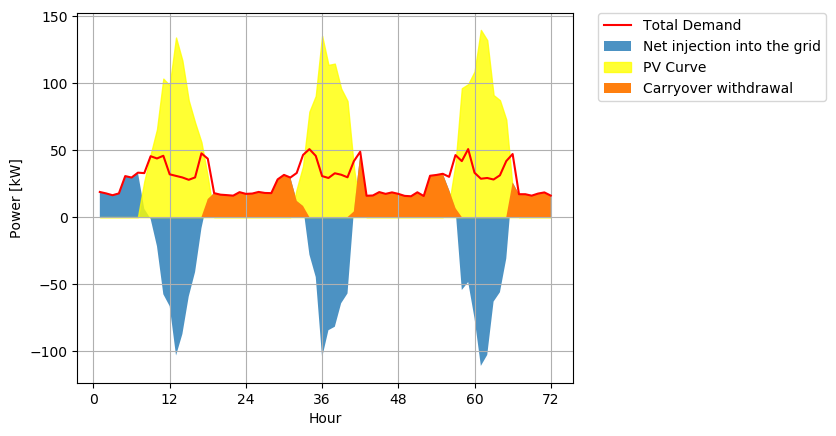

In [53]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [54]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy total_injection global_allowance withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | global_generation global_withdrawal carry_over  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | 
1 | 7258.53 8107.21 5704.69  | 27288.15 15360.07 13371.19 9142.35  | 2502.7 934.96 5704.69  | 27288.15 9142.35 4228.84  | 50.72 50.66 33.78  | 50.7 33.85 33.78 
2 | 6624.16 7441.62 5256.55  | 17379.5 8426.48 12744.8 10369.3  | 3136.84 1975.92 5256.55  | 44667.65 19511.65 2286.02  | 51.56 51.22 33.94  | 51.56 34.01 33.94 
3 | 7319.38 8126.15 5745.6  | 22075.83 11501.61 13192.66 10616.91  | 3448.16 1423.15 5745.6  | 66743.49 30128.56 2575.75  | 50.8 50.52 33.87  | 50.8 33.81 33.87 
4 | 7490.79 8453.07 5933.41  | 26288.45 14325.5 15457.09 9914.31  | 2745.07 1235.84 5933.41  | 93031.94 40042.87 5542.78  | 54.37 54.38 36.08  | 54.28 35.98

In [55]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | savings
0.0 0.0 111754.93  | 192263.61  | 395009.36 220597.12 111754.93  | 483822.13 229816.19 145618.67  | 483973.93 343985.65 145618.67  | 851100.78 
0.0 0.0 20132.67  | 218066.46  | 360486.85 202486.37 102975.72  | 492053.46 230894.81 146296.69  | 492053.46 347804.42 146296.69  | 874488.24 
0.0 0.0 67773.04  | 223273.52  | 398320.86 221112.54 112556.27  | 484766.46 229558.35 146006.24  | 484766.46 343051.08 146006.24  | 896604.19 
0.0 0.0 65776.51  | 208498.01  | 407648.76 230007.95 116235.45  | 517981.41 244280.97 155536.15  | 518849.19 369234.5 155536.15  | 945229.17 
0.0 0.0 2642.13  | 207408.97  | 391126.75 22122

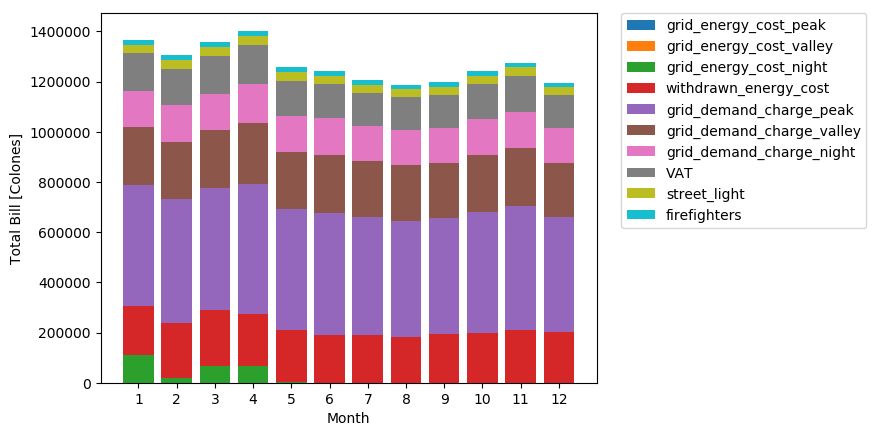

In [56]:
fields = ["grid_energy_cost_peak", 
        "grid_energy_cost_valley",
        "grid_energy_cost_night", 
        "withdrawn_energy_cost",      
        "grid_demand_charge_peak",    
        "grid_demand_charge_valley", 
        "grid_demand_charge_night",
        "VAT", "street_light", "firefighters"]
plot_bill(bills_TMT, fields);

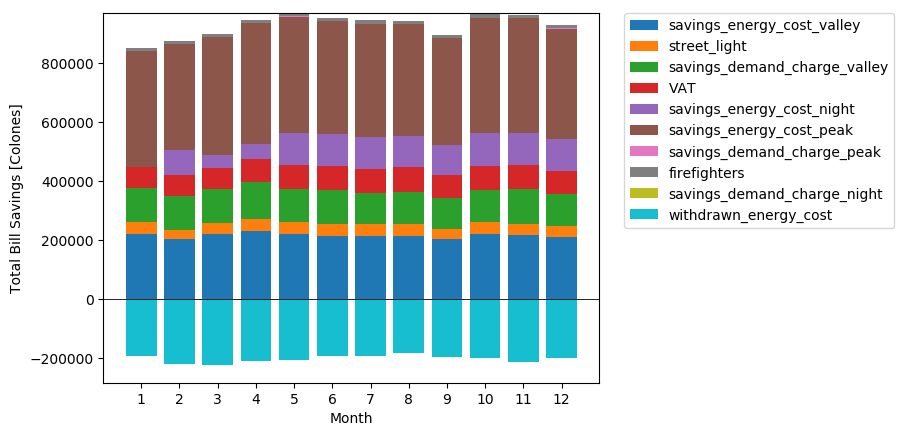

PyObject <matplotlib.lines.Line2D object at 0x14ecec400>

In [57]:
plot_savings(bills_TMT)